<a href="https://colab.research.google.com/github/mkgreen/Principal-Component-Analysis-with-Zillow/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white',color_codes=True)

In [ ]:
#loading the dataset
dataset = pd.read_csv("/content/train.csv")


In [ ]:
#Dataset shape
print("Dimension of data dataset", dataset.shape)

Dimension of data dataset (1460, 81)


In [ ]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
#Checking for datatype
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
#Filtering numerical data
df = dataset.select_dtypes(include=['float64','int64'])
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
#Checking datatype after filtering the numerical data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [ ]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Scikit Learn’s SimpleImputer algorithm can also replace all the missing values with the mean of their variable

Id                  AxesSubplot(0.125,0.799681;0.133621x0.0803191)
MSSubClass       AxesSubplot(0.285345,0.799681;0.133621x0.0803191)
LotFrontage       AxesSubplot(0.44569,0.799681;0.133621x0.0803191)
LotArea          AxesSubplot(0.606034,0.799681;0.133621x0.0803191)
OverallQual      AxesSubplot(0.766379,0.799681;0.133621x0.0803191)
OverallCond         AxesSubplot(0.125,0.703298;0.133621x0.0803191)
YearBuilt        AxesSubplot(0.285345,0.703298;0.133621x0.0803191)
YearRemodAdd      AxesSubplot(0.44569,0.703298;0.133621x0.0803191)
MasVnrArea       AxesSubplot(0.606034,0.703298;0.133621x0.0803191)
BsmtFinSF1       AxesSubplot(0.766379,0.703298;0.133621x0.0803191)
BsmtFinSF2          AxesSubplot(0.125,0.606915;0.133621x0.0803191)
BsmtUnfSF        AxesSubplot(0.285345,0.606915;0.133621x0.0803191)
TotalBsmtSF       AxesSubplot(0.44569,0.606915;0.133621x0.0803191)
1stFlrSF         AxesSubplot(0.606034,0.606915;0.133621x0.0803191)
2ndFlrSF         AxesSubplot(0.766379,0.606915;0.133621x0.0803

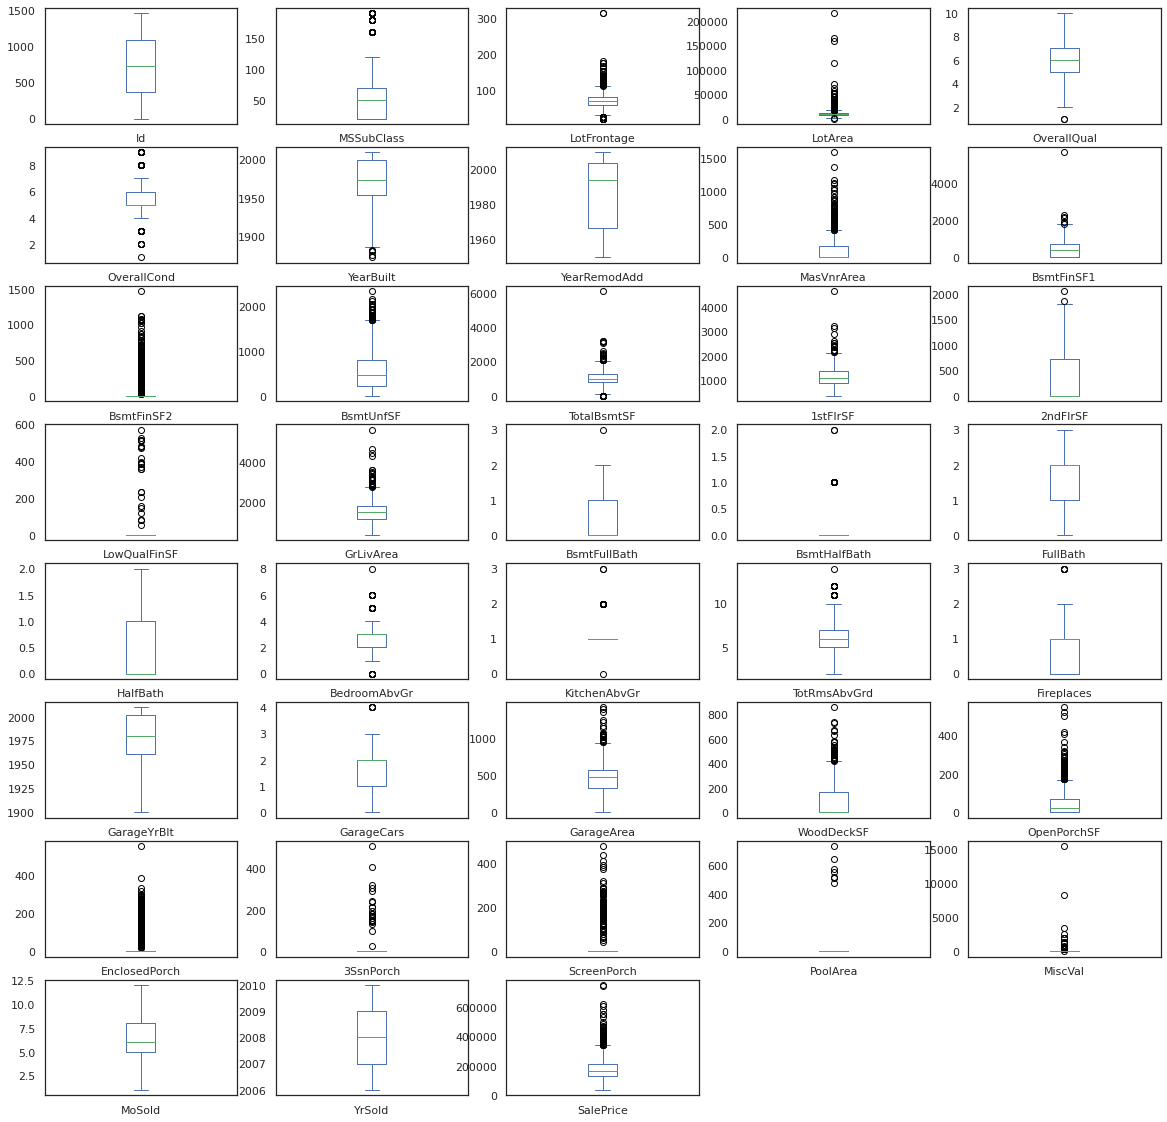

In [ ]:
#Box plot
df.plot(kind="box", subplots=True, layout=(8,5), figsize=(20,20))

**Removing outliers:**
We can use the z-score to identify outliers by treating as outliers all the data points that are too far away from 0.
It is common to use -3 and +3 as threshold. Any data point with a z-score below -3 or above +3 are treated as outliers. The reason for this common threshold is that 99.7% of the values in a standard normal distribution fall between -3 and +3.

In [ ]:
#Removing outliers
from scipy import stats
import numpy as np

# Calculate the z-scores
z_scores = stats.zscore(df)

abs_z_scores = np.abs(z_scores)

# Select data points with a z-scores above or below 3
filtered_entries = (abs_z_scores < 3).all(axis=1)

# Filter the dataset
df1 = df[filtered_entries]
df1.shape


(1015, 38)

In [ ]:
#Checking for missing values
miss_val = df.isna().sum()
miss_val

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [ ]:
#checking for missing Values
miss_val[miss_val>0].sort_values(ascending=False)

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64

In [ ]:
#Removing missing values
from sklearn.impute import SimpleImputer
columns = ['LotFrontage','GarageYrBlt','MasVnrArea']
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
for column in columns:
  imp = imp.fit(df[[column]])
  df[column] = imp.transform(df[[column]]).ravel()

In [ ]:
#Correlation
data_corr = df.corr()
data_corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,...,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050199,0.022895,0.179283,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,...,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184,0.475241
BsmtFinSF1,-0.005024,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [ ]:
#considering only the highly correlated features 
data_corr = data_corr['SalePrice'][:-1]
data_corr = data_corr[abs(data_corr)>=0.50].sort_values(ascending=False)
data_corr

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

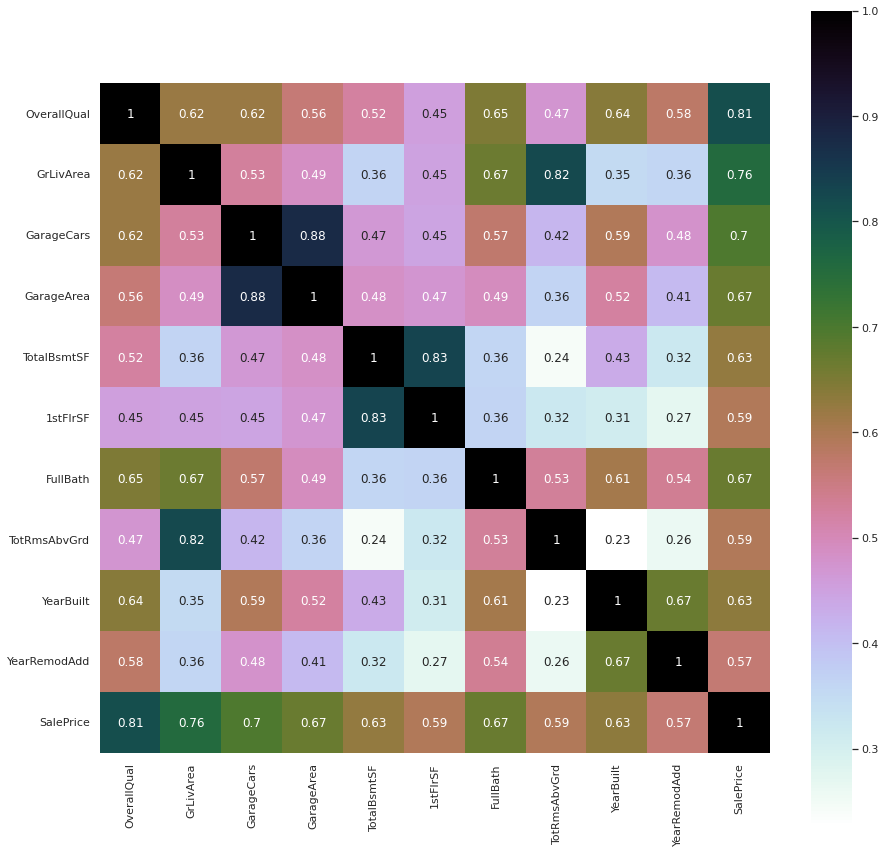

In [ ]:
#Heatmap for highly correlated features 
df_col = df1[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','SalePrice']]
corr = df_col.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True, cmap='cubehelix_r',square=True) 
plt.show()

In [ ]:
#Sperating the dataset and target variable
X=df_col.drop(['SalePrice'],axis=1)
Y=df1['SalePrice']


In [ ]:
X.shape

(1015, 10)

In [ ]:
#Normalizing the dataset
from sklearn.preprocessing import normalize
df_nor = normalize(X)
df_nor

array([[1.96316445e-03, 4.79573029e-01, 5.60904128e-04, ...,
        2.24361651e-03, 5.61745484e-01, 5.61745484e-01],
       [1.92200681e-03, 4.90386310e-01, 5.49144803e-04, ...,
        1.64743441e-03, 5.49419376e-01, 5.49693948e-01],
       [1.99054818e-03, 5.46903112e-01, 7.46455567e-04, ...,
        2.23936670e-03, 4.97637044e-01, 4.97637044e-01],
       ...,
       [1.96667570e-03, 3.43044432e-01, 5.61907342e-04, ...,
        1.68572203e-03, 5.63031157e-01, 5.63312110e-01],
       [1.68121181e-03, 4.61492642e-01, 5.60403937e-04, ...,
        1.96141378e-03, 5.60123735e-01, 5.60403937e-01],
       [1.37334859e-03, 4.74491939e-01, 4.57782864e-04, ...,
        1.60224002e-03, 4.52747253e-01, 4.55036167e-01]])

In [ ]:
X.shape
df_nor.shape

(1015, 10)

In [ ]:
#Appling PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=0.90)

X_principal = pca.fit_transform(df_nor)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2','P3']
X_principal.head()

,P1,P2,P3
0,0.002867,0.110381,0.027737
1,-0.026021,0.109540,0.035347
2,-0.131814,0.132157,0.056602
3,-0.182364,-0.082473,-0.005773
4,0.044183,-0.086222,-0.000942


In [ ]:
#Spliting the dataset after PCA
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X_principal,Y, test_size=0.20)
#considering only the highly correlated features for training and validation

print('Dimension of train_x dataframe:',train_x.shape)
print('Dimension of train_y dataframe:',train_y.shape)
print('Dimension of val_x dataframe:',test_x.shape)
print('Dimension of val_y dataframe:',test_y.shape)

Dimension of train_x dataframe: (812, 3)
Dimension of train_y dataframe: (812,)
Dimension of val_x dataframe: (203, 3)
Dimension of val_y dataframe: (203,)


In [ ]:
print(pca.components_)

[[-6.63029559e-04 -4.54330949e-01 -6.50499921e-04 -1.88475228e-01
  -4.91183948e-01 -4.14171238e-01 -3.77953412e-04 -6.08222748e-04
   4.08067135e-01  4.22777518e-01]
 [ 5.95291574e-04  7.65735674e-01  2.37725758e-04  3.11960487e-02
  -5.25675644e-01 -3.58128243e-01  5.23797033e-04  2.15600757e-03
  -6.55710808e-02 -6.14822091e-02]
 [ 1.41285656e-03 -1.43378618e-01  2.81922069e-03  9.56240228e-01
   1.40222660e-02 -2.51712196e-01  4.25649116e-04 -6.98517006e-04
   3.81423159e-02  5.10834286e-03]]


In [ ]:
print(pca.noise_variance_)

0.0002409241587640196


In [ ]:
pca.explained_variance_ratio_

array([0.53240994, 0.32726579, 0.07655107])

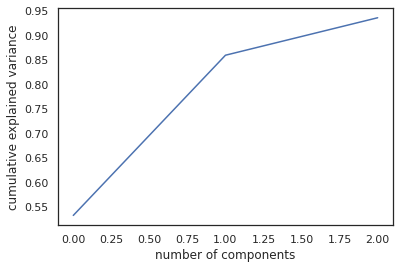

In [ ]:
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
#LinearRegression with PCA
from sklearn.linear_model import LinearRegression

ln_reg = LinearRegression()
ln_reg.fit(train_x, train_y)

LinearRegression()

In [ ]:
from seaborn import regression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score,accuracy_score

df_pred = ln_reg.predict(test_x)
print('Mean Absolute Error of linear regression:',mean_absolute_error(df_pred, test_y))
print('Mean Square Error of linear regression:', mean_squared_error(df_pred, test_y))
print('R_Squared Score of linear regression:', r2_score(test_y,df_pred))


Mean Absolute Error of linear regression: 24813.64068791785
Mean Square Error of linear regression: 1164606971.9625804
R_Squared Score of linear regression: 0.7118144717809853


In [ ]:
#GradientBoostingRegressor with PCA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score,accuracy_score
gbcl = GradientBoostingRegressor(n_estimators = 50, learning_rate = 0.05)
gbcl = gbcl.fit(train_x, train_y)
df_pred = gbcl.predict(test_x)
gbcl_score=gbcl.score(train_x, train_y)
print("The Gradient Boost classifier model accuracy is {}".format(gbcl_score))
print(mean_squared_error(test_y,df_pred))
print(mean_absolute_error(test_y,df_pred))
print("R2",r2_score(test_y,df_pred))

The Gradient Boost classifier model accuracy is 0.8164296159017059
1018562982.743311
22225.463677455806
R2 0.747953499959257


In [ ]:
#BaggingRegressor with PCA

from sklearn.ensemble import BaggingRegressor

bgc = BaggingRegressor(base_estimator=LinearRegression())
bgcl = bgc.fit(train_x, train_y)
test_pred = bgcl.predict(test_x)
bgcl_score=bgcl.score(test_x, test_y)

In [ ]:
print(mean_squared_error(test_y,df_pred))
print(mean_absolute_error(test_y,df_pred))
print("R2",r2_score(test_y,df_pred))

1018562982.743311
22225.463677455806
R2 0.747953499959257


In [ ]:
submission_data = pd.DataFrame({'SalePrice':df_pred, "Actual SalePrice": test_y})
submission_data


,SalePrice,Actual SalePrice
124,181634.874781,181000
1084,161521.333267,187500
751,146339.585325,162000
122,135853.850557,136000
192,211509.799651,192000
...,...,...
65,287765.670864,317000
596,123994.969886,114504
203,130524.444713,149000
256,203696.316710,207500


#Testing without PCA

In [ ]:
X=df_col.drop(['SalePrice'],axis=1)
Y=df1['SalePrice']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.20)

print('Dimension of train_X :',X_train.shape)
print('Dimension of train_Y :',Y_train.shape)
print('Dimension of test_X :',X_test.shape)
print('Dimension of test_Y :',Y_test.shape)

Dimension of train_X : (812, 10)
Dimension of train_Y : (812,)
Dimension of test_X : (203, 10)
Dimension of test_Y : (203,)


In [ ]:
#linear regression without PCA
from sklearn.linear_model import LinearRegression

ln_reg = LinearRegression()
ln_reg.fit(X_train,Y_train)

LinearRegression()

In [ ]:
#linear regression:
from seaborn import regression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score,accuracy_score

df_pred = ln_reg.predict(X_test)
print('Mean Absolute Error of linear regression:',mean_absolute_error(df_pred, Y_test))
print('Mean Square Error of linear regression:', mean_squared_error(df_pred, Y_test))
print('R_Squared Score of linear regression:', r2_score(Y_test,df_pred))

Mean Absolute Error of linear regression: 15591.576244663704
Mean Square Error of linear regression: 430401586.0057038
R_Squared Score of linear regression: 0.8608764439814367


In [ ]:
submission_data = pd.DataFrame({'SalePrice':df_pred, "Actual SalePrice":Y_test})
submission_data

,SalePrice,Actual SalePrice
180,173092.439314,177000
364,171626.036372,190000
1054,246711.911950,255000
1329,203313.604458,176500
147,223181.126202,222500
...,...,...
1240,213690.771853,224900
450,115010.352172,110000
1085,156031.767708,147000
1091,166375.741905,160000


In [ ]:
#GradientBoostingRegressor withour PCA
from sklearn.ensemble import GradientBoostingRegressor
gbcl = GradientBoostingRegressor(n_estimators = 50, learning_rate = 0.05)
gbcl = gbcl.fit(X_train,Y_train)
test_pred = gbcl.predict(X_test)
gbcl_score=gbcl.score(X_train,Y_train)
print("The Gradient Boost classifier model accuracy is {}".format(gbcl_score))
print('Mean Absolute Error of GradientBoostingRegressor:',mean_absolute_error(df_pred, Y_test))
print('Mean Square Error of GradientBoostingRegressor:', mean_squared_error(df_pred, Y_test))
print('R_Squared Score of GradientBoostingRegressor:', r2_score(Y_test,df_pred))

The Gradient Boost classifier model accuracy is 0.8848259814216992
Mean Absolute Error of GradientBoostingRegressor: 15591.576244663704
Mean Square Error of GradientBoostingRegressor: 430401586.0057038
R_Squared Score of GradientBoostingRegressor: 0.8608764439814367


In [ ]:
import xgboost as xgb
from sklearn import metrics
#from xgboost import XGRegressor
xgcl = xgb.XGBRegressor()
xgcl = xgcl.fit(X_train,Y_train)


[16:48:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#BaggingRegressor

from sklearn.ensemble import BaggingRegressor

bgc = BaggingRegressor(base_estimator=LinearRegression())
bgcl = bgc.fit(X_train,Y_train)
test_pred = bgcl.predict(X_test)
bgcl_score=bgcl.score(X_test, Y_test)

In [ ]:
print(mean_squared_error(Y_test,df_pred))
print(mean_absolute_error(Y_test,df_pred))
print("R2",r2_score(Y_test,df_pred))

430401586.0057038
15591.576244663704
R2 0.8608764439814367
